-----------
Initializing structure...
time for choose_chunkdivision = 9.87127e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 100 with resolution 25
time for set_epsilon = 0.000729546 s
-----------
run 0 finished at t = 700.0 (35000 timesteps)


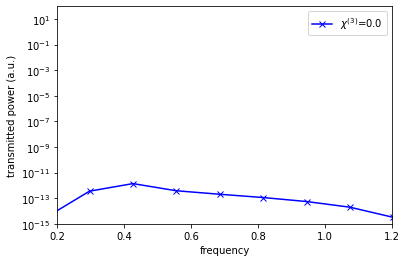

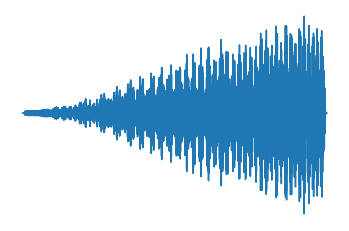

In [20]:
# practise from :
# https://meep.readthedocs.io/en/latest/Python_Tutorials/Third_Harmonic_Generation/

from typing import Tuple, List, Union
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import meep as mp
mp.simulation.do_progress = False

nfreq = 10
amp = 1
sz = 100 # size of the cell in z direction
fcen =1/3 # center frequency of source
df = fcen/10. # frequency width of source
# amp = amp # amplitude of source
k=.00 # Kerr susceptibility
dpml = 1.0 # pml thickness
dimensions = 1 # one dimensional problem
cell = mp.Vector3(0,0,sz)
pml_layers = [mp.PML(dpml)]
resolution = 25

default_material = mp.Medium(index=1, chi3=k)

sources = [mp.Source(mp.GaussianSource(fcen, fwidth=df),component=mp.Ex,center=mp.Vector3(0,0,-.5*sz+dpml), amplitude=amp)]
# nfreq = 400
fmin = fcen / 2.0
fmax = fcen*4

sim = mp.Simulation(cell_size=cell,
                   sources=sources,
                   boundary_layers=pml_layers,
                   default_material=default_material,
                   resolution=resolution,
                   dimensions=dimensions)
mon_pt = mp.Vector3(0, 0, 0.5 * sz - dpml - 0.5)

trans = sim.add_flux( 0.5*(fmin+fmax), fmax-fmin, nfreq, mp.FluxRegion(mon_pt) )

# sim.run( until_after_sources=mp.stop_when_fields_decayed(100, mp.Ex, mon_pt, 1e-9) )
sim.run(until=700)

freqs = mp.get_flux_freqs(trans)
trans_flux = mp.get_fluxes(trans)

fig, ax = plt.subplots()
ax.semilogy(freqs,trans_flux,'bx-',label=f'$\chi^{{(3)}}$={k}')
ax.set_xlabel('frequency')
ax.set_ylabel('transmitted power (a.u.)')
ax.set_xlim(0.2,1.2)
ax.set_ylim(1e-15,1e2)
ax.legend()
fig.savefig('transmitted_power_vs_frequency_vary_logk.png',dpi=150,
            bbox_inches='tight')
plt.show()

ex_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ex)
plt.figure()
plt.plot(ex_data.transpose())
plt.axis("off")
plt.show()
